## 1.  Create a model to optimize prediction of the IRIS dataset using a perceptron.

### 1a.  Load the IRIS dataset and split the data Split the data into two with 50% for training and 50% for testing.

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [187]:
from sklearn import datasets
iris=datasets.load_iris()

x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5, train_size=0.5)

In [188]:
print(iris['DESCR']) # Looking at the description of iris dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 1b. Display the first four rows of the dataset showing the feature names.


In [189]:
df = pd.DataFrame(x[0:4], index=pd.RangeIndex(start=1, stop=5), columns=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"])
print(df, "\n\nNote: All features are measured in cm")

   Sepal Length  Sepal Width  Petal Length  Petal Width
1           5.1          3.5           1.4          0.2
2           4.9          3.0           1.4          0.2
3           4.7          3.2           1.3          0.2
4           4.6          3.1           1.5          0.2 

Note: All features are measured in cm


### 1c. Create a Perceptron class and instantiate a new Perceptron. Fit the data to the model for 10 training iterations. Compute the prediction.


In [190]:
class Perceptron:
    
    def __init__(self, learning_rate=0.1):
        
        self.learning_rate = learning_rate
        self._b = 0.0
        self._w = None
        self.misclassified_samples = []
        
    def fit(self, x: np.array, y: np.array, n_iter=10):
        self._b = 0.0
        self._w = np.zeros(x.shape[1])
        self.misclassified_samples = []
        
        for _ in range(n_iter):
            print('Number of epoch(s): ', _+1)
            errors = 0
        
            for xi, yi in zip(x, y):
                update = self.learning_rate * (yi - self.predict(xi))
                self._b += update
                self._w += update * xi
                errors += int(update != 0.0)

            self.misclassified_samples.append(errors)
        
    def f(self, x: np.array) -> float: 
        
        return np.dot(x, self._w) + self._b
    
    def predict(self, x:np.array):
#         One-Hot-Encoding
#         for idx,inputs in enumerate(X):
#             if(y[idx] == 0): 
#                 self.output = np.array([1,0,0]) #Class1 {1,0,0}
#             elif(y[idx] == 1):
#                 self.output = np.array([0,1,0]) #Class2 {0,1,0}
#             elif(y[idx] == 2):
#                 self.output = np.array([0,0,1]) #Class3 {0,0,1}
#         I guess we can use one-hot-encoding here to implement three classes
            return np.where(self.f(x) >= 0, 1, -1)
    

In [191]:
classifier = Perceptron()
classifier.fit(x_train, y_train, n_iter=10)
predictions = classifier.predict(x_test)

Number of epoch(s):  1
Number of epoch(s):  2
Number of epoch(s):  3
Number of epoch(s):  4
Number of epoch(s):  5
Number of epoch(s):  6
Number of epoch(s):  7
Number of epoch(s):  8
Number of epoch(s):  9
Number of epoch(s):  10


In [192]:
# Also measuring the prediction

from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test,predictions), 3))

0.307


### 1d.  Use the first three features of the data and create a 3-D Scatter plot of the three types of flowers.

#### Making three different arrays based on their target values

In [193]:
setosa = []
versicolour = []
virginica = []

for i,j in zip(x,y):
    if j == 0:
        setosa.append(i)
    elif j == 1:
        versicolour.append(i)
    elif j == 2:
        virginica.append(i)
setosa = np.array(setosa)
versicolour = np.array(versicolour)
virginica = np.array(virginica)

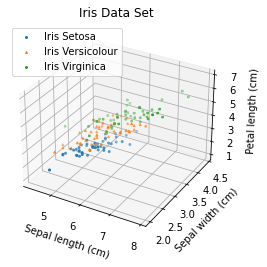

In [194]:
ax = plt.axes(projection='3d')
ax.set_title('Iris Data Set')
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
ax.set_zlabel('Petal length (cm)')
ax.scatter(setosa[:, 0], setosa[:, 1], setosa[:, 2], label='Iris Setosa', marker='o', s=4)
ax.scatter(versicolour[:, 0], versicolour[:, 1], versicolour[:, 2], label='Iris Versicolour', marker='^', s=4)
ax.scatter(virginica[:, 0], virginica[:, 1], virginica[:, 2], label='Iris Virginica', marker='x', s=4)
plt.legend(loc='upper left')
plt.show()

### 1e. Plot the prediction for epochs 1, 10, 100, and 200.


#### 1 Epoch

In [195]:
classifier.fit(x_train, y_train, n_iter=1)
predictions = classifier.predict(x_test)

Number of epoch(s):  1


In [196]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [197]:
print(round(accuracy_score(y_test,predictions), 3))

0.307


#### As all predictions are 1 that implies that all the test data is predicted to be Versicolour

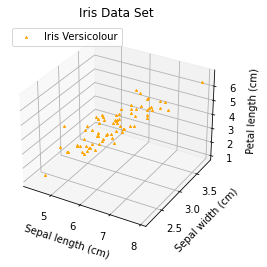

In [198]:
ax = plt.axes(projection='3d')
ax.set_title('Iris Data Set')
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
ax.set_zlabel('Petal length (cm)')
for i,j in zip(x_test, predictions):
    if j == 0:
        ax.scatter(i[0], i[1], i[2], label='Iris Setosa', marker='o', s=4, color='blue')
        
    elif j == 1:
        ax.scatter(i[0], i[1], i[2], label='Iris Versicolour', marker='^', s=4, color='orange')
        
    elif j == 2:
        ax.scatter(i[0], i[1], i[2], label='Iris Virginica', marker='x', s=4, color='green')
ax.legend(['Iris Versicolour'], loc='upper left')
plt.show()

#### 10 Epochs

In [199]:
classifier.fit(x_train, y_train, n_iter=10)
predictions = classifier.predict(x_test)

Number of epoch(s):  1
Number of epoch(s):  2
Number of epoch(s):  3
Number of epoch(s):  4
Number of epoch(s):  5
Number of epoch(s):  6
Number of epoch(s):  7
Number of epoch(s):  8
Number of epoch(s):  9
Number of epoch(s):  10


In [200]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [201]:
print(round(accuracy_score(y_test,predictions), 3))

0.307


#### All predictions are still 1 that implies that all the test data is predicted to be Versicolour

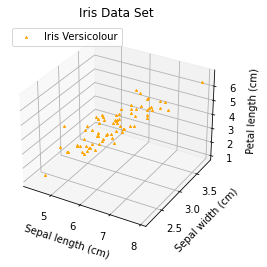

In [202]:
ax = plt.axes(projection='3d')
ax.set_title('Iris Data Set')
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
ax.set_zlabel('Petal length (cm)')
for i,j in zip(x_test, predictions):
    if j == 0:
        ax.scatter(i[0], i[1], i[2], label='Iris Setosa', marker='o', s=4, color='lightblue')
    elif j == 1:
        ax.scatter(i[0], i[1], i[2], label='Iris Versicolour', marker='^', s=4, color='orange')
    elif j == 2:
        ax.scatter(i[0], i[1], i[2], label='Iris Virginica', marker='x', s=4, color='green')
ax.legend(['Iris Versicolour'], loc='upper left')
plt.show()

#### 100 Epochs

In [203]:
classifier.fit(x_train, y_train, n_iter=100)
predictions = classifier.predict(x_test)

Number of epoch(s):  1
Number of epoch(s):  2
Number of epoch(s):  3
Number of epoch(s):  4
Number of epoch(s):  5
Number of epoch(s):  6
Number of epoch(s):  7
Number of epoch(s):  8
Number of epoch(s):  9
Number of epoch(s):  10
Number of epoch(s):  11
Number of epoch(s):  12
Number of epoch(s):  13
Number of epoch(s):  14
Number of epoch(s):  15
Number of epoch(s):  16
Number of epoch(s):  17
Number of epoch(s):  18
Number of epoch(s):  19
Number of epoch(s):  20
Number of epoch(s):  21
Number of epoch(s):  22
Number of epoch(s):  23
Number of epoch(s):  24
Number of epoch(s):  25
Number of epoch(s):  26
Number of epoch(s):  27
Number of epoch(s):  28
Number of epoch(s):  29
Number of epoch(s):  30
Number of epoch(s):  31
Number of epoch(s):  32
Number of epoch(s):  33
Number of epoch(s):  34
Number of epoch(s):  35
Number of epoch(s):  36
Number of epoch(s):  37
Number of epoch(s):  38
Number of epoch(s):  39
Number of epoch(s):  40
Number of epoch(s):  41
Number of epoch(s):  42
N

In [204]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [205]:
print(round(accuracy_score(y_test,predictions), 3))

0.307


#### All predictions are still 1 which implies that all the test data is predicted to be Versicolour

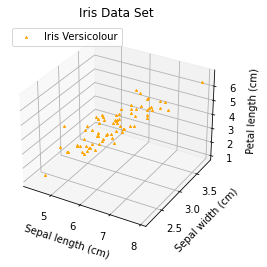

In [206]:
ax = plt.axes(projection='3d')
ax.set_title('Iris Data Set')
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
ax.set_zlabel('Petal length (cm)')
for i,j in zip(x_test, predictions):
    if j == 0:
        ax.scatter(i[0], i[1], i[2], label='Iris Setosa', marker='o', s=4, color='lightblue')
    elif j == 1:
        ax.scatter(i[0], i[1], i[2], label='Iris Versicolour', marker='^', s=4, color='orange')
    elif j == 2:
        ax.scatter(i[0], i[1], i[2], label='Iris Virginica', marker='x', s=4, color='green')
ax.legend(['Iris Versicolour'], loc='upper left')
plt.show()

#### 200 Epochs

In [207]:
classifier.fit(x_train, y_train, n_iter=200)
predictions = classifier.predict(x_test)

Number of epoch(s):  1
Number of epoch(s):  2
Number of epoch(s):  3
Number of epoch(s):  4
Number of epoch(s):  5
Number of epoch(s):  6
Number of epoch(s):  7
Number of epoch(s):  8
Number of epoch(s):  9
Number of epoch(s):  10
Number of epoch(s):  11
Number of epoch(s):  12
Number of epoch(s):  13
Number of epoch(s):  14
Number of epoch(s):  15
Number of epoch(s):  16
Number of epoch(s):  17
Number of epoch(s):  18
Number of epoch(s):  19
Number of epoch(s):  20
Number of epoch(s):  21
Number of epoch(s):  22
Number of epoch(s):  23
Number of epoch(s):  24
Number of epoch(s):  25
Number of epoch(s):  26
Number of epoch(s):  27
Number of epoch(s):  28
Number of epoch(s):  29
Number of epoch(s):  30
Number of epoch(s):  31
Number of epoch(s):  32
Number of epoch(s):  33
Number of epoch(s):  34
Number of epoch(s):  35
Number of epoch(s):  36
Number of epoch(s):  37
Number of epoch(s):  38
Number of epoch(s):  39
Number of epoch(s):  40
Number of epoch(s):  41
Number of epoch(s):  42
N

In [208]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [209]:
print(round(accuracy_score(y_test,predictions), 3))

0.307


#### Even for 200 epochs all predictions are 1 which means all the test data is predicted to be Versicolour

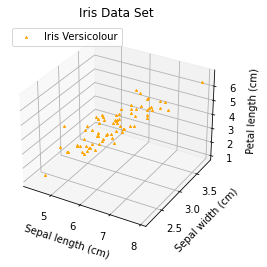

In [210]:
ax = plt.axes(projection='3d')
ax.set_title('Iris Data Set')
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
ax.set_zlabel('Petal length (cm)')
for i,j in zip(x_test, predictions):
    if j == 0:
        ax.scatter(i[0], i[1], i[2], label='Iris Setosa', marker='o', s=4, color='lightblue')
    elif j == 1:
        ax.scatter(i[0], i[1], i[2], label='Iris Versicolour', marker='^', s=4, color='orange')
    elif j == 2:
        ax.scatter(i[0], i[1], i[2], label='Iris Virginica', marker='x', s=4, color='green')
ax.legend(['Iris Versicolour'], loc='upper left')
plt.show()

## 2. Using the IRIS dataset again. Build a multilayer perceptron with a depth of 2, 20% input drop rate, and 5-% hidden layer drop rate. For the non-linear activation function, use the leaky rectify function for the first dense leayer, and softmax for the second dense layer.

### Leaky Rectify Nonlinearity Function
#### The Leaky Rectifier has a non-zero gradient for negative inputs which often helps convergence:
#### ϕ(v) = v if v ≥ 0
####  α · v otherwise.


In [211]:
import matplotlib.cm as cm
import random

iris_data = datasets.load_iris()
n_samples, n_features = iris_data.data.shape

def separate_data():
    A = iris_dataset[0:40]
    tA = iris_dataset[40:50]
    B = iris_dataset[50:90]
    tB = iris_dataset[90:100]
    C = iris_dataset[100:140]
    tC = iris_dataset[140:150]
    train = np.concatenate((A,B,C))
    test =  np.concatenate((tA,tB,tC))
    return train,test

train_porcent = 80 # Training percent
test_porcent = 20 # Test percent
iris_dataset = np.column_stack((iris_data.data,iris_data.target.T)) #Join X and Y
iris_dataset = list(iris_dataset)
random.shuffle(iris_dataset)

Filetrain, Filetest = separate_data()

train_X = np.array([i[:4] for i in Filetrain])
train_y = np.array([i[4] for i in Filetrain])
test_X = np.array([i[:4] for i in Filetest])
test_y = np.array([i[4] for i in Filetest])

In [212]:
import tensorflow as tf

In [213]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin

class MultiLayerPerceptron(BaseEstimator, ClassifierMixin): 
    def __init__(self, params=None):     
        if (params == None):
            self.inputLayer = 4                        # Input Layer
            self.hiddenLayer = 5                       # Hidden Layer
            self.outputLayer = 3                       # Outpuy Layer
            self.learningRate = 0.005                  # Learning rate
            self.max_epochs = 600                      # Epochs
            self.BiasHiddenValue = -1                  # Bias HiddenLayer
            self.BiasOutputValue = -1                  # Bias OutputLayer
            self.activation = self.ativacao['sigmoid'] # Activation function
            self.deriv = self.derivada['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epocas']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.ativacao[params['ActivationFunction1']]
            self.deriv = self.derivada[params['ActivationFunction2']]
        
        'Starting Bias and Weights'
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = 3 
        
    pass
    
    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]
    
    def d_softmax(x):
        softmax = np.exp(x) / np.sum(np.exp(x))
        SM = softmax.reshape(-1, 1)
        return np.diagflat(softmax) - np.dot(SM, SM.T)
    
    ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
      'leaky_relu': (lambda x: x*(x > 0.1)),
         'softmax': (lambda x: np.exp(x) / np.sum(np.exp(x), axis=0))
               }
    derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1*(x > 0)),
      'leaky_relu': (lambda x: 1*(x > 0.1)),
         'softmax': (lambda x: -x*x),
               }
 
    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        'Stage 1 - Error: OutputLayer'
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
        
        arrayStore = []
        'Stage 2 - Update weights OutputLayer and HiddenLayer'
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
      
        'Stage 3 - Error: HiddenLayer'
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
 
        'Stage 4 - Update weights HiddenLayer and InputLayer(x)'
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])
                
    def show_err_graphic(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()

    def predict(self, X, y):
        'Returns the predictions for every element of X'
        my_predictions = []
        'Forward Propagation'
        drop_out = tf.nn.dropout(X, 0.2) # Input Dropout 20%
        forward = np.matmul(drop_out,self.WEIGHT_hidden) + self.BIAS_hidden 
        drop_out_hidden = tf.nn.dropout(forward, 0.05) # Hidden Layer Dropout 5%
        forward = np.matmul(drop_out_hidden, self.WEIGHT_output) + self.BIAS_output
                                 
        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])
            
        array_score = []
        for i in range(len(my_predictions)):
            if my_predictions[i] == 0: 
                array_score.append([i, 'Iris-setosa', my_predictions[i], y[i]])
            elif my_predictions[i] == 1:
                 array_score.append([i, 'Iris-versicolour', my_predictions[i], y[i]])
            elif my_predictions[i] == 2:
                 array_score.append([i, 'Iris-virginica', my_predictions[i], y[i]])
                    
        dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'output', 'hoped_output'])
        return my_predictions, dataframe

    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X); 
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X):
                self.output = np.zeros(self.classes_number)
                'Stage 1 - (Forward Propagation)'
                
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                'Stage 2 - One-Hot-Encoding'
                if(y[idx] == 0): 
                    self.output = np.array([1,0,0]) #Class1 {1,0,0}
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0]) #Class2 {0,1,0}
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1]) #Class3 {0,0,1}
                
                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error
         
                'Backpropagation : Update Weights'
                self.Backpropagation_Algorithm(inputs)
                
            total_error = (total_error / n)
            if((count_epoch % 1 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
                
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)
             
                
            count_epoch += 1
        self.show_err_graphic(error_array,epoch_array)
        
        plt.plot(W0[0])
        plt.title('Weight Hidden update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3', 'neuron4', 'neuron5'])
        plt.ylabel('Value Weight')
        plt.show()
        
        plt.plot(W1[0])
        plt.title('Weight Output update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3'])
        plt.ylabel('Value Weight')
        plt.show()

        return self

### 2a. Plot the performance for the first 10 epochs.


Epoch  1 - Total Error:  0.10574769568042432
Epoch  2 - Total Error:  0.10129789746400387
Epoch  3 - Total Error:  0.10126081581220037
Epoch  4 - Total Error:  0.10126050679843533
Epoch  5 - Total Error:  0.10126050422332061
Epoch  6 - Total Error:  0.10126050420186133
Epoch  7 - Total Error:  0.1012605042016825
Epoch  8 - Total Error:  0.10126050420168102
Epoch  9 - Total Error:  0.101260504201681
Epoch  10 - Total Error:  0.101260504201681


C:\Users\kkesh\AppData\Local\Temp/ipykernel_6388/628809832.py:82: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)


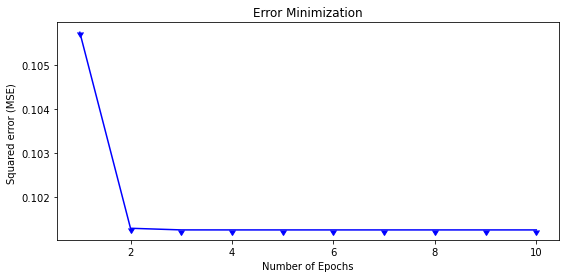

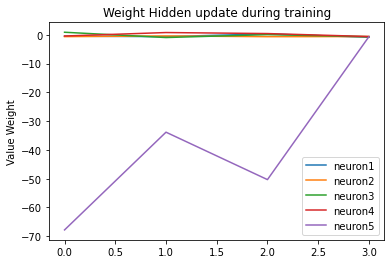

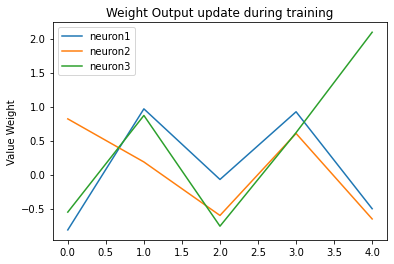

In [214]:
dictionary = {'InputLayer':4, 'HiddenLayer':5, 'OutputLayer':3,
              'Epocas':10, 'LearningRate':0.005,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction1':'leaky_relu', 'ActivationFunction2':'softmax'}

Perceptron = MultiLayerPerceptron(dictionary)

try:
    Perceptron.fit(train_X,train_y)
except AttributeError:
    print('')

### 2b. Use a different activation function. What is the result?



Epoch  1 - Total Error:  0.10570956247598037
Epoch  2 - Total Error:  0.1013467273771987
Epoch  3 - Total Error:  0.09495832959142413
Epoch  4 - Total Error:  0.08761551202287211
Epoch  5 - Total Error:  0.08149869752003228
Epoch  6 - Total Error:  0.07749923254755556
Epoch  7 - Total Error:  0.0748887668101042
Epoch  8 - Total Error:  0.07305718829546085
Epoch  9 - Total Error:  0.07170135616559811
Epoch  10 - Total Error:  0.07066429871215911


C:\Users\kkesh\AppData\Local\Temp/ipykernel_6388/190176387.py:82: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)


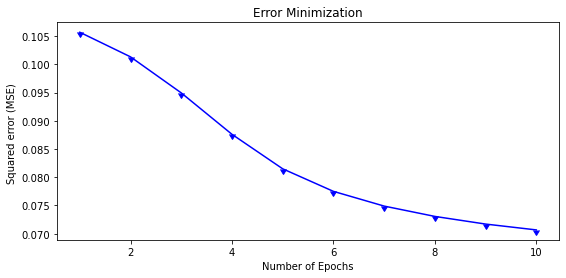

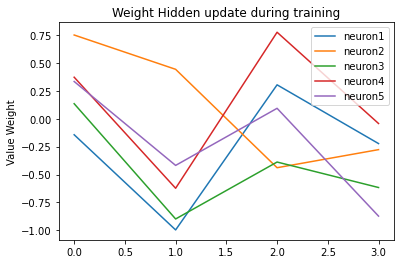

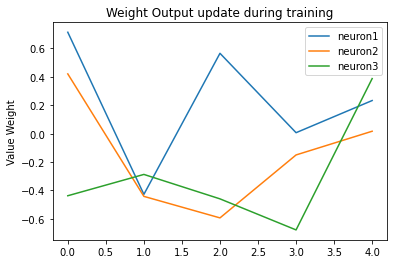

In [27]:
dictionary = {'InputLayer':4, 'HiddenLayer':5, 'OutputLayer':3,
              'Epocas':10, 'LearningRate':0.005,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction1':'sigmoid', 'ActivationFunction2': 'sigmoid'}

Perceptron = MultiLayerPerceptron(dictionary)

try:
    Perceptron.fit(train_X,train_y)
except AttributeError:
    print('')

#### Keeping the other parameters constant and changing the activation functions before input & hidden layer there was decrease in the error which was already low before

### 2c. Add more layers to the multilayer perceptron. Use 4 layers instead of 2. What is the result?


In [28]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin

class MultiLayerPerceptron(BaseEstimator, ClassifierMixin): 
    def __init__(self, params=None):     
        if (params == None):
            self.inputLayer = 4                        # Input Layer
            self.hiddenLayer = 5                       # Hidden Layer
            self.outputLayer = 3                       # Outpuy Layer
            self.learningRate = 0.005                  # Learning rate
            self.max_epochs = 600                      # Epochs
            self.BiasHiddenValue = -1                  # Bias HiddenLayer
            self.BiasOutputValue = -1                  # Bias OutputLayer
            self.activation = self.ativacao['sigmoid'] # Activation function
            self.deriv = self.derivada['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epocas']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.ativacao[params['ActivationFunction1']]
            self.deriv = self.derivada[params['ActivationFunction2']]
        
        'Starting Bias and Weights'
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = 3 
        
    pass
    
    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]
    
    def d_softmax(x):
        softmax = np.exp(x) / np.sum(np.exp(x))
        SM = softmax.reshape(-1, 1)
        return np.diagflat(softmax) - np.dot(SM, SM.T)
    
    ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
      'leaky_relu': (lambda x: x*(x > 0.1)),
         'softmax': (lambda x: np.exp(x) / np.sum(np.exp(x), axis=0))
               }
    derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1*(x > 0)),
      'leaky_relu': (lambda x: 1*(x > 0.1)),
         'softmax': (lambda x: -x*x),
               }
 
    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        'Stage 1 - Error: OutputLayer'
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
        
        arrayStore = []
        'Stage 2 - Update weights OutputLayer and HiddenLayer'
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
      
        'Stage 3 - Error: HiddenLayer'
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
 
        'Stage 4 - Update weights HiddenLayer and InputLayer(x)'
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])
                
    def show_err_graphic(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()

    def predict(self, X, y):
        'Returns the predictions for every element of X'
        my_predictions = []
        'Forward Propagation'
        # Input dropout
        drop_out = tf.nn.dropout(X, 0.2) 
        # Input Layer
        forward = np.matmul(drop_out,self.WEIGHT_hidden) + self.BIAS_hidden 
        # Hidden Layer Dropout
        drop_out_hidden = tf.nn.dropout(forward, 0.05) 
        # Hidden Layers
        forward = np.matmul(drop_out_hidden, self.WEIGHT_output) + self.BIAS_output
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output
        
                                 
        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])
            
        array_score = []
        for i in range(len(my_predictions)):
            if my_predictions[i] == 0: 
                array_score.append([i, 'Iris-setosa', my_predictions[i], y[i]])
            elif my_predictions[i] == 1:
                 array_score.append([i, 'Iris-versicolour', my_predictions[i], y[i]])
            elif my_predictions[i] == 2:
                 array_score.append([i, 'Iris-virginica', my_predictions[i], y[i]])
                    
        dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'output', 'hoped_output'])
        return my_predictions, dataframe

    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X); 
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X):
                self.output = np.zeros(self.classes_number)
                'Stage 1 - (Forward Propagation)'
                
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                'Stage 2 - One-Hot-Encoding'
                if(y[idx] == 0): 
                    self.output = np.array([1,0,0]) #Class1 {1,0,0}
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0]) #Class2 {0,1,0}
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1]) #Class3 {0,0,1}
                
                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error
         
                'Backpropagation : Update Weights'
                self.Backpropagation_Algorithm(inputs)
                
            total_error = (total_error / n)
            if((count_epoch % 1 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
                
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)
             
                
            count_epoch += 1
        self.show_err_graphic(error_array,epoch_array)
        
        plt.plot(W0[0])
        plt.title('Weight Hidden update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3', 'neuron4', 'neuron5'])
        plt.ylabel('Value Weight')
        plt.show()
        
        plt.plot(W1[0])
        plt.title('Weight Output update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3'])
        plt.ylabel('Value Weight')
        plt.show()

        return self

Epoch  1 - Total Error:  0.0813212527669836
Epoch  2 - Total Error:  0.08020926364377143
Epoch  3 - Total Error:  0.07792165176215948
Epoch  4 - Total Error:  0.07590771904542076
Epoch  5 - Total Error:  0.0741502880777205
Epoch  6 - Total Error:  0.07261191012579095
Epoch  7 - Total Error:  0.07125288819935136
Epoch  8 - Total Error:  0.07003612051404638
Epoch  9 - Total Error:  0.0689297424072887
Epoch  10 - Total Error:  0.06790799081328738


C:\Users\kkesh\AppData\Local\Temp/ipykernel_6388/2409158292.py:82: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)


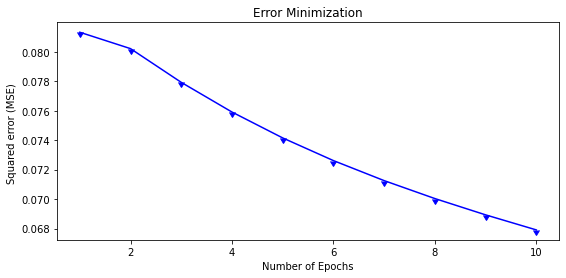

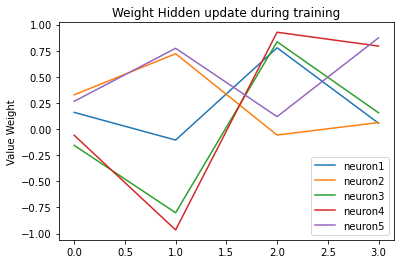

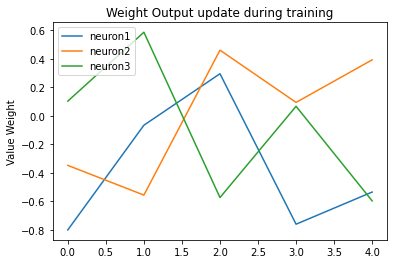

In [29]:
dictionary = {'InputLayer':4, 'HiddenLayer':5, 'OutputLayer':3,
              'Epocas':10, 'LearningRate':0.005,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction1':'sigmoid', 'ActivationFunction2': 'sigmoid'}

Perceptron = MultiLayerPerceptron(dictionary)

try:
    Perceptron.fit(train_X,train_y)
except AttributeError:
    print('')

#### Adding more hidden layers in general should improve the accuracy but in this case it was the other way round or unnoticeable change

## 3. Load the Store Data file provided on Pilot and create a data frame of the list of items in the file


In [30]:
store_data = pd.read_csv('./store_data.csv')
store_data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3a. For the 7500 records, implement the Association Rule with a minimum support of 0.0045, minimum confidence of 0.2, and minimum lift of 3.


In [71]:
from apyori import apriori
import time, timeit
records = []
start_time = time.perf_counter()
for i in range(0, 7500):
    records.append([str(store_data.values[i,j]) for j in range(0, 20)])
    association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3) # min_length=2
association_results = list(association_rules)
end_time = time.perf_counter()

### 3b. Print the first 10 Rules along with each Support, Confidence and Lift values.


In [32]:
for i in range(0, 10):
    pair = association_results[i][0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(association_results[i][1]))
    print("Confidence: " + str(association_results[i][2][0][2]))
    print("Lift: " + str(association_results[i][2][0][3]))
    print("=====================================")

Rule: chicken -> light cream
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: mushroom cream sauce -> escalope
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845
Rule: pasta -> escalope
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287
Rule: ground beef -> herb & pepper
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096
Rule: ground beef -> tomato sauce
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528
Rule: whole wheat pasta -> olive oil
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.130221288078346
Rule: pasta -> shrimp
Support: 0.005066666666666666
Confidence: 0.3220338983050848
Lift: 4.514493901473151
Rule: chicken -> nan
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: shrimp -> frozen vegetables
Support: 0.005333333333333333
Confidence: 0.23255813953488372
Lift: 3.

### 3c. How long did it take to run the implementation for the 7500 items.


In [73]:
print('Total Time Taken to run 7500 items: ', round((end_time - start_time)/60, 2), 'minutes')

Total Time Taken to run 7500 items:  5.08 minutes


### 3d. What are some other datasets for which this type of algorithm will be useful.


### The Association rules algorithm can be used on any dataset related to Market Based Analysis or Network Analysis. It's used to find the correlations and co-occurrences between data sets. Any place where we can find patterns
### I believe based on the association we can also use it to give recommendations, might give movie suggestions in netflix.

## 4. Open Orange 3 either from the command line or from the Anaconda Navigator. Using the IRIS dataset again, create a scatter plot of the data.


### Please find the file named "Homework_II_4.ows" which contains 4a, 4b, 4c and 4d

## 5. Load the breast cancer dataset from Scikit-Learn.


In [34]:
cancer = datasets.load_breast_cancer()

In [35]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### 5a. What are the 13 features of this dataset?


In [36]:
df = pd.DataFrame(cancer.feature_names, columns=['Features'])
df.index+=1
df

,Features
1,mean radius
2,mean texture
3,mean perimeter
4,mean area
5,mean smoothness
6,mean compactness
7,mean concavity
8,mean concave points
9,mean symmetry
10,mean fractal dimension


In [37]:
print("The first 13 Features:\n\n", cancer['feature_names'][:13])

The first 13 Features:

 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error']


### 5b. What are the labels of the data?


In [38]:
print("Labels:\n\n", cancer['target_names'])

Labels:

 ['malignant' 'benign']


### 5c. Split the data into 70% training and 30% testing.


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, train_size=0.7, random_state=59)

In [40]:
len(X_train)

398

### 5d. Create a SVM classifier and train the model.


In [41]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

### 5e. Predict the output using the testing data.


In [42]:
y_pred = clf.predict(X_test)

### 5f. What is the accuracy, precision, and recall scores?


In [43]:
from sklearn import metrics
print("Accuracy: ", round(metrics.accuracy_score(y_test, y_pred), 2))
print("Precision: ", round(metrics.precision_score(y_test, y_pred), 2))
print("Recall: ", round(metrics.recall_score(y_test, y_pred), 2))

Accuracy:  0.94
Precision:  0.93
Recall:  0.97


### 5g. Load this data into Orange and visualize the dataset and find informative projections.



### Please find the file named "Homework_II_5g.ows"

### I've also tried exporting the same train and test data & used it in Orange, in which we save the SVM model and load it again, I've also uploaded this file as well "Homework_II_5g_train_test.ows"

In [44]:
df = pd.DataFrame(X_train, columns=cancer.feature_names)

series = pd.Series(y_train)

for idx,i in enumerate(series):
    if i == 0:
        series[idx] = 'malignant'
    elif i == 1:
        series[idx] = 'benign'
        
df['type'] = series
df.to_csv('train.csv', index=False)

In [45]:
df = pd.DataFrame(X_test, columns=cancer.feature_names)

series = pd.Series(y_test)

for idx,i in enumerate(series):
    if i == 0:
        series[idx] = 'malignant'
    elif i == 1:
        series[idx] = 'benign'
        
df['type'] = series
df.to_csv('test.csv', index=False)

## 6. Using the IRIS dataset again, use the decision tree classifier to fit the data and plot the tree.


In [132]:
x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.5, train_size=0.5, random_state=109)

[Text(0.4, 0.875, 'X[3] <= 0.8\ngini = 0.66\nsamples = 75\nvalue = [30, 22, 23]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(0.6, 0.625, 'X[3] <= 1.75\ngini = 0.5\nsamples = 45\nvalue = [0, 22, 23]'),
 Text(0.4, 0.375, 'X[2] <= 5.05\ngini = 0.153\nsamples = 24\nvalue = [0, 22, 2]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 22\nvalue = [0, 22, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 21]')]

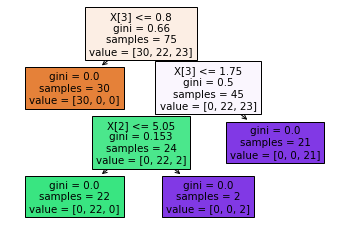

In [146]:
from sklearn import tree
classifier=tree.DecisionTreeClassifier()
clf = classifier.fit(X_train, y_train)
tree.plot_tree(clf, filled=True)

### 6a. Display the decision surface of the tree for the first two features.


In [87]:
from sklearn.datasets import load_iris

iris = load_iris()

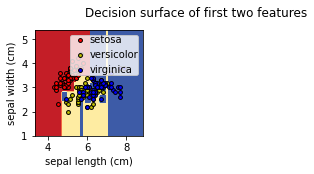

In [167]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features

    X = iris.data[:, 0:2]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx+1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )
    break
plt.suptitle("Decision surface of first two features")
plt.legend(borderpad=0, handletextpad=0)
_ = plt.axis("tight")

### 6b. Is there a difference in the results from using SVM? What are the advantages and disadvantages when compared to SVM for this dataset?



In [147]:
from sklearn import svm
from sklearn import metrics

clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy for SVM Model:",metrics.accuracy_score(y_test, y_pred))

Accuracy for SVM Model: 0.9466666666666667


In [148]:
y_pred_DCT = clf_DCT.predict(X_test)
print("Accuracy for Decision-Tree-Classifier Model:",metrics.accuracy_score(y_test, y_pred_DCT))

Accuracy for Decision-Tree-Classifier Model: 0.9466666666666667


#### Don't know why I have the same accuracy here for both the models.
#### But usually SVM uses kernel trick to solve non-linear problems whereas decision trees derive hyper-rectangles in input space to solve the problem and also Decision trees are better for categorical data and it deals colinearity better than SVM.


### 6c. Try displaying the decision surface using different features. Is there a difference? Is there better separation?


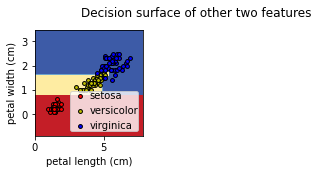

In [169]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features

    X = iris.data[:, 2:4]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx+1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )
    break
plt.suptitle("Decision surface of other two features")
plt.legend(borderpad=0, handletextpad=0)
_ = plt.axis("tight")

### 6d. Use Orange to do the same.


#### Please find the orange file with the name "Homework_II_6d.ows"

## 7. In Orange, use the Breast Cancer dataset with a Random Forest model.


#### Please find the orange file with the name "Homework_II_7.ows"

### 7a. Visualize the results using the Pythagorean Forest.


#### Please double click on Pythagorean Forest in the orange to view the results

### 7b. What pre-processing did you do to reduce the data?


#### I've used continuize discrete variables as the pre-processing technique

### 7c. What are the features that produce the best results? What can you use to make this simpler?


#### We can use dimensionality reduction like PCA to make this simpler, Clump thickness  vs Unif_Cell_Shape produced best results comparitively

### 7d. How do you interpret the results?


#### By checking how better the bifurcation between the classes malignant & benign is done